## Beta de de una conjunto de acciones

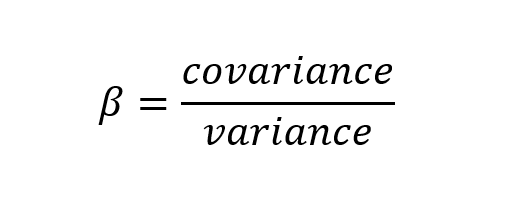

Ya teniendo clara la fórmula clásica para calcular el beta de cualquier activo es importante su interpretación:
- Beta > 1, la acción es más volátil que el mercado, ejemplo: beta de 1.5, el mercado sube 10%, la acción subirá un 15%, lo mismo si el mercado baja (en el papel).
- Beta = 1, la acción sube y baja a la par con el mercado.
- Beta < 1, la acción es menos volátil, ejemplo: beta de 0.8, el mercado baja un 10%, la acción solo lo hará un 8%, lo mismo si el mercado sube (en el papel).

In [5]:
# importando librerias indispensables
import datetime as dt
import numpy as np
import pandas as pd
from scipy import stats
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [6]:
# definiendo un rango de tiempo
start = dt.datetime(2017, 1, 1)
end = dt.datetime.now()

# selección de acciones o los tickers de las empresas consideradas + el SP500
tickers = ['AAPL', 'GOOGL', 'NFLX', 'BAC', 'V', 'DIS', 'NKE', 'MCO', 'TXRH', 'T', '^GSPC']

# obteniendo los precios de cierre del conjunto de acciones + el SP500
prices = pdr.get_data_yahoo(tickers, start, end)['Adj Close']
prices.tail(3)

[*********************100%***********************]  11 of 11 completed


,AAPL,BAC,DIS,GOOGL,MCO,NFLX,NKE,T,TXRH,V,^GSPC
Date,,,,,,,,,,,
2023-02-22 00:00:00-05:00,148.910004,34.290001,101.680000,91.650002,293.640015,334.880005,119.900002,19.379999,106.430000,220.020004,3991.050049
2023-02-23 00:00:00-05:00,149.399994,34.259998,101.730003,90.889999,294.440002,323.649994,119.959999,19.350000,105.209999,221.130005,4012.320068
2023-02-24 00:00:00-05:00,146.710007,34.209999,100.300003,89.129997,289.239990,317.149994,118.040001,19.240000,103.820000,219.550003,3970.040039


In [4]:
# obteniendo los retornos
log_returns = np.log(prices/prices.shift())
log_returns.tail()

,AAPL,BAC,DIS,GOOGL,MCO,NFLX,NKE,T,TXRH,V,^GSPC
Date,,,,,,,,,,,
2023-02-17 00:00:00-05:00,-0.007575,0.001982,-0.005781,-0.012220,-0.003477,-0.007872,0.003692,0.009302,-0.007925,-0.010103,-0.002771
2023-02-21 00:00:00-05:00,-0.027042,-0.023759,-0.030199,-0.027508,-0.022171,-0.030522,-0.030416,-0.011902,0.002489,-0.013238,-0.020245
2023-02-22 00:00:00-05:00,0.002892,-0.006685,-0.004024,-0.001526,-0.001459,-0.007793,-0.009959,0.008811,0.017535,-0.002723,-0.001575
2023-02-23 00:00:00-05:00,0.003285,-0.000875,0.000492,-0.008327,0.002721,-0.034110,0.000500,-0.001549,-0.011529,0.005032,0.005315
2023-02-24 00:00:00-05:00,-0.018169,-0.001460,-0.014157,-0.019554,-0.017818,-0.020288,-0.016135,-0.005701,-0.013300,-0.007171,-0.010593


### Cálculo covarianzas y la varianza del mercado

#### 1. Covarianza

In [12]:
covariance_matrix = log_returns.cov()
covariance_matrix

,AAPL,BAC,DIS,GOOGL,MCO,NFLX,NKE,T,TXRH,V,^GSPC
AAPL,0.000389,0.000192,0.000177,0.000254,0.000227,0.000267,0.000201,0.000102,0.000161,0.000211,0.000198
BAC,0.000192,0.000438,0.000233,0.000188,0.000216,0.000150,0.000201,0.000171,0.000259,0.000216,0.000196
DIS,0.000177,0.000233,0.000367,0.000182,0.000185,0.000205,0.000192,0.000133,0.000225,0.000193,0.000164
GOOGL,0.000254,0.000188,0.000182,0.000352,0.000214,0.000272,0.000189,0.000093,0.000173,0.000203,0.000186
MCO,0.000227,0.000216,0.000185,0.000214,0.000359,0.000220,0.000213,0.000122,0.000202,0.000220,0.000191
NFLX,0.000267,0.000150,0.000205,0.000272,0.000220,0.000844,0.000200,0.000072,0.000166,0.000191,0.000183
NKE,0.000201,0.000201,0.000192,0.000189,0.000213,0.000200,0.000392,0.000110,0.000184,0.000188,0.000171
T,0.000102,0.000171,0.000133,0.000093,0.000122,0.000072,0.000110,0.000237,0.000110,0.000113,0.000109
TXRH,0.000161,0.000259,0.000225,0.000173,0.000202,0.000166,0.000184,0.000110,0.000638,0.000196,0.000168
V,0.000211,0.000216,0.000193,0.000203,0.000220,0.000191,0.000188,0.000113,0.000196,0.000292,0.000175


El resultado es una matriz de covarianza, nos interesa la última columna, ya que, posee la covariaza de cada acción respecto al mercado.

In [11]:
# creando variable que contenga la covarianza de cada acción respecto al mercado
# .iloc para seleccionar la columnda y filas con la información de interés
covariances = covariance_matrix.iloc[:10, 10]
covariances

AAPL     0.000198
BAC      0.000196
DIS      0.000164
GOOGL    0.000186
MCO      0.000191
NFLX     0.000183
NKE      0.000171
T        0.000109
TXRH     0.000168
V        0.000175
Name: ^GSPC, dtype: float64

#### 2. Varianza del SP500

In [14]:
# 1 método
market_variance = log_returns['^GSPC'].var()
market_variance

0.00016121850138949123

In [18]:
# 2 método: .iloc
market_variance_2 = log_returns.iloc[:, 10].var()
market_variance_2

0.00016121850138949123

### Calculando betas

In [19]:
betas = covariances / market_variance
betas

AAPL     1.228162
BAC      1.214056
DIS      1.018435
GOOGL    1.156036
MCO      1.186762
NFLX     1.137659
NKE      1.059169
T        0.674051
TXRH     1.039377
V        1.083078
Name: ^GSPC, dtype: float64

In [22]:
# en el caso de que desee selecciónar beta de Bank of America y AT&T
betas[['BAC', 'T']]

BAC    1.214056
T      0.674051
Name: ^GSPC, dtype: float64